In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA
import plotly.express as px
import os
from skimage.io import imread
import seaborn as sns

# Import files

In [2]:
if not os.path.exists('output'):
    os.makedirs('output')

# Load data
after_dir ='26_08_2021'
before_dir = '29_07_2021'

band_names = ['B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12'.split(',')]
# Load the image
image = imread(f'{before_dir}/B01_07_2021.tiff')

before_multispectral = np.dstack((  
                                    imread(f'{before_dir}/B01_07_2021.tiff'),
                                    imread(f'{before_dir}/B02_07_2021.tiff'),
                                    imread(f'{before_dir}/B03_07_2021.tiff'),
                                    imread(f'{before_dir}/B04_07_2021.tiff'),
                                    imread(f'{before_dir}/B05_07_2021.tiff'),
                                    imread(f'{before_dir}/B06_07_2021.tiff'),
                                    imread(f'{before_dir}/B07_07_2021.tiff'),
                                    imread(f'{before_dir}/B08_07_2021.tiff'),
                                    imread(f'{before_dir}/B8A_07_2021.tiff'),
                                    imread(f'{before_dir}/B09_07_2021.tiff'),
                                    imread(f'{before_dir}/B11_07_2021.tiff'),
                                    imread(f'{before_dir}/B12_07_2021.tiff')
                                    ))

after_multispectral = np.dstack((
                                    imread(f'{after_dir}/B01_08_2021.tiff'),
                                    imread(f'{after_dir}/B02_08_2021.tiff'),
                                    imread(f'{after_dir}/B03_08_2021.tiff'),
                                    imread(f'{after_dir}/B04_08_2021.tiff'),
                                    imread(f'{after_dir}/B05_08_2021.tiff'),
                                    imread(f'{after_dir}/B06_08_2021.tiff'),
                                    imread(f'{after_dir}/B07_08_2021.tiff'),
                                    imread(f'{after_dir}/B08_08_2021.tiff'),
                                    imread(f'{after_dir}/B8A_08_2021.tiff'),
                                    imread(f'{after_dir}/B09_08_2021.tiff'),
                                    imread(f'{after_dir}/B11_08_2021.tiff'),
                                    imread(f'{after_dir}/B12_08_2021.tiff')
                                    ))

## CCA analysis

In [3]:
# Define a function for CCA analysis
def cca_analysis(multispectral_image, band_names):
    # Reshape the image to a 2D array
    rows, cols, n_bands = multispectral_image.shape
    image_flattened = multispectral_image.reshape((rows * cols, n_bands))

    # Standardize the data
    scaler = StandardScaler()
    image_flattened_scaled = scaler.fit_transform(image_flattened)

    # Create the CCA model
    cca = CCA(n_components=12)

    # Fit the CCA model
    cca.fit(image_flattened_scaled, image_flattened_scaled)

    # Transform the data
    image_transformed = cca.transform(image_flattened_scaled)

    return image_transformed

# Apply CCA to before and after images
before_cca = cca_analysis(before_multispectral, band_names)
after_cca = cca_analysis(after_multispectral, band_names)

# Calculate change detection
change_detection = after_cca - before_cca

# Reshape the transformed image back to the original image shape
rows, cols, n_bands = before_multispectral.shape
change_detection_image = change_detection.reshape((rows, cols, n_bands))

# Plot the changes for each band

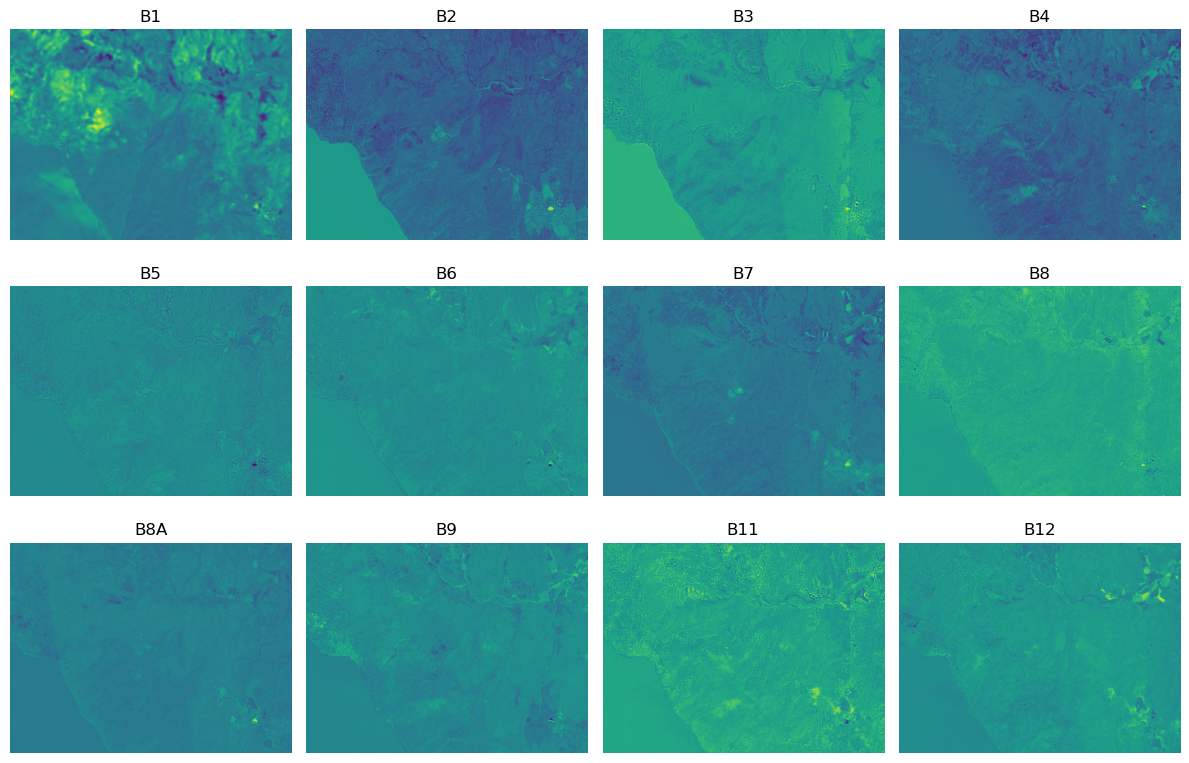

In [4]:
# Plot the bands for change detection
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
axes = axes.flatten()
for i in range(12):
    axes[i].imshow(change_detection_image[:, :, i], cmap='viridis')
    axes[i].set_title(band_names[0][i])
    axes[i].axis('off')
plt.tight_layout()
plt.savefig('output/change_detection_cca_bands.png', dpi=300)
plt.show()

# Plot the magnitude of the changes

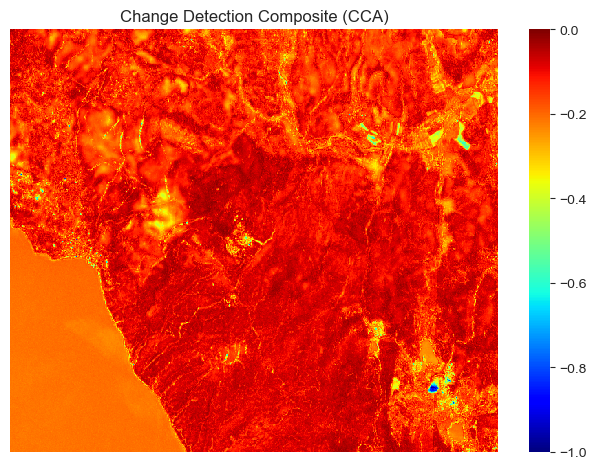

In [7]:
# Calculate the magnitude of changes across all bands (canonical components)
magnitude_of_changes_cca = np.linalg.norm(change_detection_image, axis=2)

# Normalize the magnitude to the range [0, 1]
normalized_changes_cca = (magnitude_of_changes_cca - np.min(magnitude_of_changes_cca)) / (np.max(magnitude_of_changes_cca) - np.min(magnitude_of_changes_cca))

# Create a color composite using the normalized changes
color_composite_cca = np.stack([normalized_changes_cca] * 3, axis=2)  # Repeat the normalized changes for RGB channels

# Plot the color composite for CCA
sns.set_style('white')
sns.heatmap(normalized_changes_cca, cmap='jet', cbar=True)
plt.title('Change Detection Composite (CCA)')
plt.axis('off')
plt.tight_layout()
plt.savefig('output/change_detection_cca.png', dpi=300)
plt.show()